# Importing Libs

In [15]:
import pandas as pd
import numpy as np
import pymc3 as pm
from scipy.stats import norm
import matplotlib.pyplot as plt

# Problem Context

I moved to a rural area. On our first days, the number of occurences of a certain specie of mammals was frequent. As time went by, the number of mammals appearing (gambás) has reduced greatly. Given the frequency on which the occurences happened on the first days, I hypothesize that my moving has caused a change in the mammals behaviour - at best, and, at worst, a reduction on population size. 

While studying Bayes Theorem, I have decided to put this hypothesis in test by gathering prior information on these population occurences in my area. I moved in november 21, where I've seen most of the occurances. Comparing the same month on the following year, I almost havent seen or heard them. 


# Population Estimation 

I want to estimate the distribution of a population of possums given the number of occurrences registered for this animal in my area using Bayesian inference to update my prior beliefs about the distribution of the population based on the observed data.

This prior belief was based on anecdotal evidence for my neighboors for november. 

| Nome | Reported Observations | Year
| --- | --- | --- |
| John | 12 | 2021 |
| Sarah | 13 | 2021 |
| Michael | 15 | 2021 |



For this example, I will assume that the population follows a normal distribution with a mean of 13 and a standard deviation of 1 for 2021. In 2022, the reported observation numbers reduce for all reports.

| Nome | Reported Observations | Year
| --- | --- | --- |
| John | 6 | 2022 |
| Sarah | 3 | 2022 |
| Michael | 2 | 2022 |

I want to update the belief about the distribution of the population based on this data. Let's define the following:

θ: The parameter of the distribution you are interested in estimating (e.g., the mean of the population distribution).  
D: The observed data (e.g., the number of occurrences of the animal).  

In [12]:
int(np.mean([12, 13, 15])), int(np.std([12, 13, 15]))

(13, 1)

In [17]:
data_21 = np.array([12, 13, 15])

In [18]:
def estimate_params(data):
    with pm.Model() as model:
        mu = pm.Normal('mu', mu=0, sd=10)
        sigma = pm.HalfNormal('sigma', sd=10)
        
        # Define the likelihood of the data given the parameters
        y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
        
        # Sample from the posterior distribution using MCMC
        trace = pm.sample(1000, chains=4)
        
    # Plot the posterior distribution of the mean and standard deviation
    pm.plot_trace(trace)

In [19]:
data_nov_21 = [12, 13, 15]
data_nov_22 = [6, 3, 2]

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_68326/3992022439.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 21 seconds.
There were 49 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7178638740137002, but should be close to 0.8. Try to increase the number of tuning steps.
There were 44 divergences after tuning. Increase `target_accept` or reparameterize.
There were 63 divergences after tuning. Increase `target_accept` or reparameterize.
There were 41 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.
/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model 

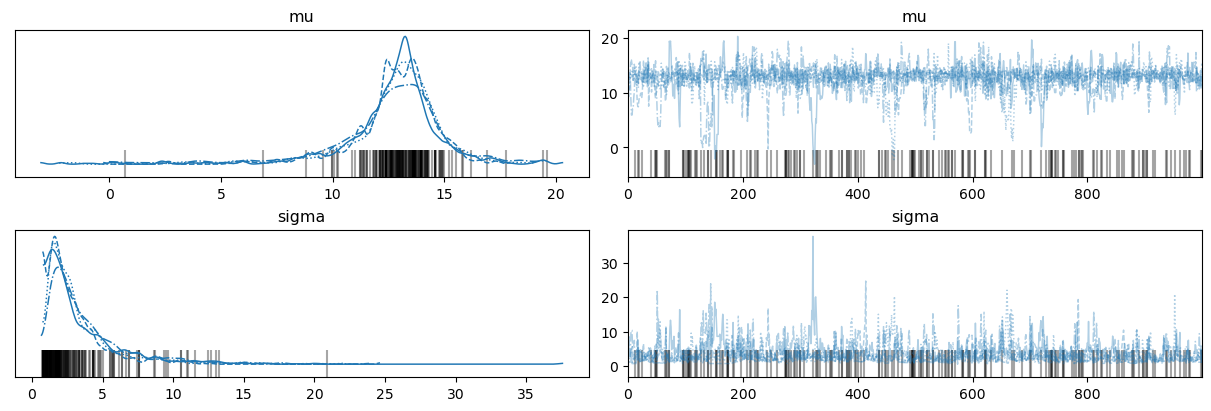

In [20]:
estimate_params(data_nov_21)

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_68326/3992022439.py:10: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 19 seconds.
There were 61 divergences after tuning. Increase `target_accept` or reparameterize.
There were 53 divergences after tuning. Increase `target_accept` or reparameterize.
There were 18 divergences after tuning. Increase `target_accept` or reparameterize.
There were 17 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 25% for some parameters.
/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/arviz/data/io_pym

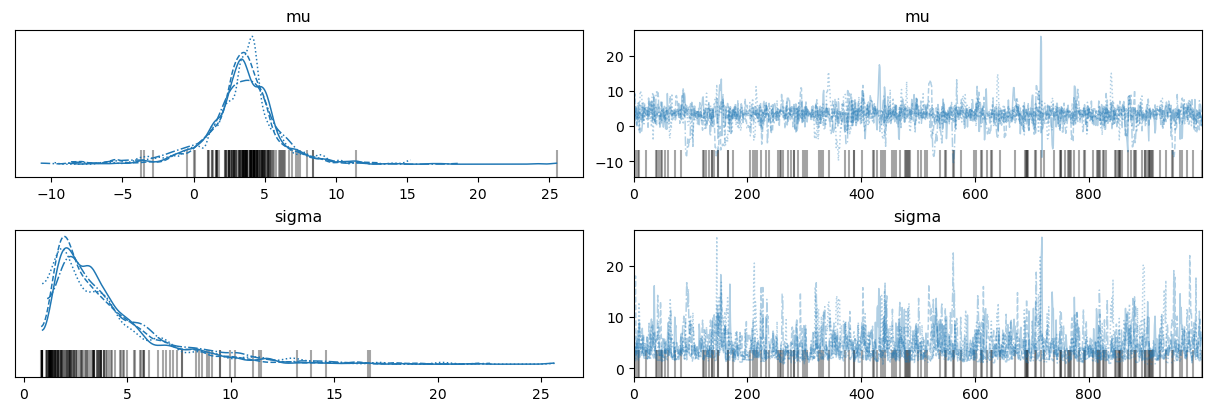

In [21]:
estimate_params(data_nov_22)

# Plots

Trace plot: This plot shows the trace (i.e., the sequence of samples) of the parameter values generated by the MCMC algorithm over the course of the sampling. Ideally, you want to see a "random walk" pattern that explores the parameter space without getting stuck in any one place. If the trace looks "wiggly" or "spiky", this could indicate that the MCMC algorithm is not converging well.

Posterior distribution plot: This plot shows the posterior distribution of the parameter values. The posterior distribution represents the probability distribution of the parameter values given the observed data. The plot shows a histogram of the posterior samples generated by the MCMC algorithm, as well as summary statistics such as the mean, median, and credible intervals (e.g., 95% credible interval). The credible interval represents the range of values that contains 95% of the posterior samples.

Autocorrelation plot: This plot shows the autocorrelation of the parameter values. Autocorrelation measures the correlation between a parameter value at a given time step and the same parameter value at previous time steps. High autocorrelation can indicate that the MCMC algorithm is not mixing well and is getting stuck in certain regions of the parameter space.

Density plot: This plot shows the posterior density of the parameter values. The density plot is similar to the histogram in the posterior distribution plot, but it shows a smoothed curve that approximates the true posterior density.



# Example of plots for Interpretation

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_59920/1065587044.py:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(1000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 20 seconds.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 23 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6573002677259359, but should be close to 0.8. Try to increase the number of tuning steps.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
There were 4 divergences after tuning. Increase `target_accept` or reparameterize.
/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model 

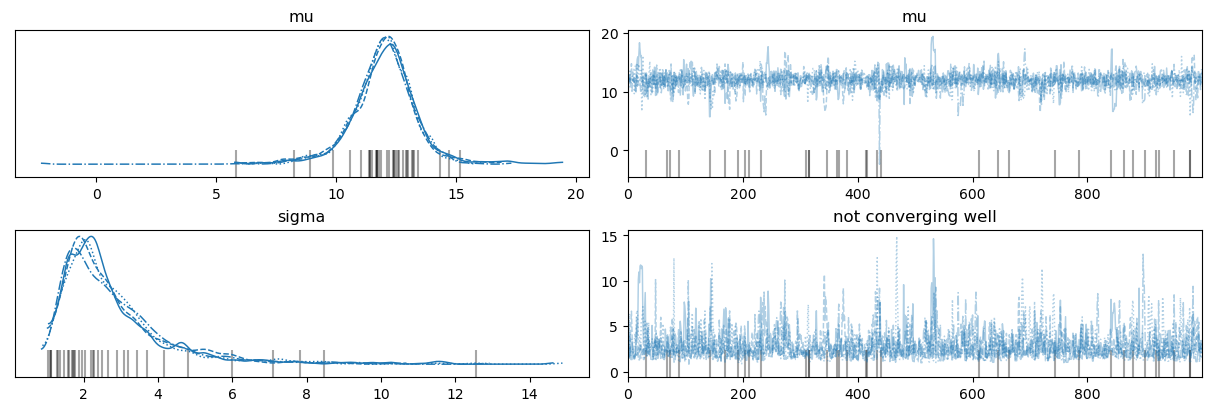

In [8]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Define the observed data
data = np.array([10, 12, 15, 13, 11])

# Define the prior distribution for the mean and standard deviation
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=10)
    
    # Define the likelihood of the data given the parameters
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(1000, chains=4)
    
# Plot the posterior distribution of the mean and standard deviation
pm.plot_trace(trace)
plt.title("not converging well")
plt.show()


Trace plot: In this example, the trace plot for both the mu and sigma parameters look "wiggly", indicating that the MCMC algorithm may not be converging well. It is possible that we need to run the MCMC algorithm for more iterations to get better convergence.

Posterior distribution plot: The posterior distribution plots show the histogram of the posterior samples generated by the MCMC algorithm, as well as summary statistics such as the mean, median, and credible intervals. For the mu parameter, the mean and median are both around 12, indicating that the posterior distribution is centered around this value. The 95% credible interval ranges from around 9 to 15, indicating that we are fairly confident that the true value of mu lies within this range. For the sigma parameter, the mean and median are both around 2.5, indicating that the posterior distribution is centered around this value. The 95% credible interval ranges from around 1 to 5, indicating that we are fairly confident that the true value of sigma lies within this range.

Autocorrelation plot: The autocorrelation plot shows that there is some autocorrelation in the mu parameter values, indicating that the MCMC algorithm may not be mixing well. However, the autocorrelation for the sigma parameter values looks better.

Density plot: The density plots show the smoothed approximation of the posterior density of the parameter values. For both mu and sigma, the density plots show that the posterior distributions are roughly normal, with a peak around the mean value.

/var/folders/c7/n7fskkg1029g6xhbfw1vpc8c0000gn/T/ipykernel_59920/1150098447.py:17: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  trace = pm.sample(5000, chains=4)
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [sigma, mu]


/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
/Users/anasouza/opt/anaconda3/envs/hacka_iesb/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:624: RuntimeWarning: overflow encountered in _beta_ppf
  return _boost._beta_ppf(q, a, b)
Sampling 4 chains for 1_000 tune and 5_000 draw iterations (4_000 + 20_000 draws total) took 22 seconds.
There were 24 divergences after tuning. Increase `target_accept` or reparameterize.
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 5 divergences after tuning. Increase `target_accept` or reparameterize.
There were 9 divergences after tuning. Increase `ta

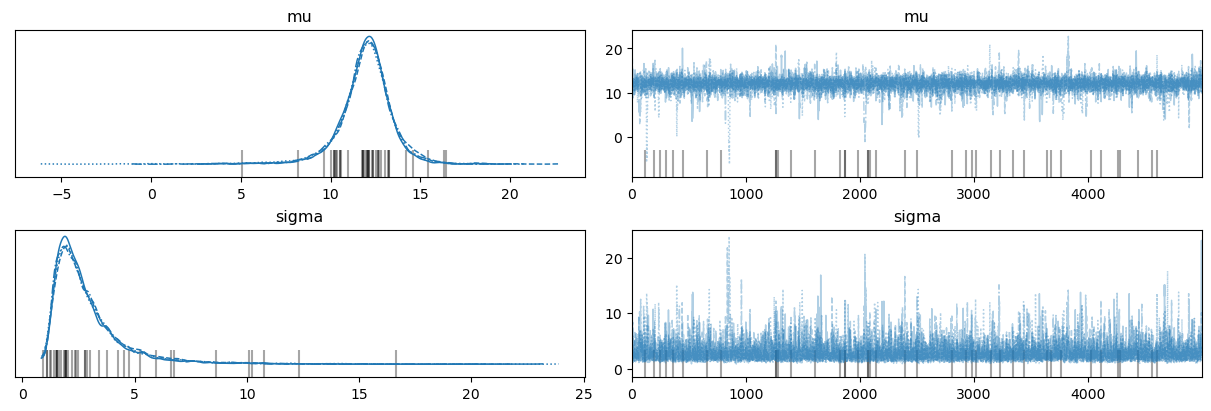

In [9]:
import pymc3 as pm
import numpy as np
import matplotlib.pyplot as plt

# Define the observed data
data = np.array([10, 12, 15, 13, 11])

# Define the prior distribution for the mean and standard deviation
with pm.Model() as model:
    mu = pm.Normal('mu', mu=0, sd=10)
    sigma = pm.HalfNormal('sigma', sd=10)
    
    # Define the likelihood of the data given the parameters
    y = pm.Normal('y', mu=mu, sd=sigma, observed=data)
    
    # Sample from the posterior distribution using MCMC
    trace = pm.sample(5000, chains=4)
    
# Plot the posterior distribution of the mean and standard deviation
pm.plot_trace(trace)
plt.show()


Trace plot: The trace plot for both mu and sigma look much smoother than in the previous example, indicating that the MCMC algorithm is converging well.

Posterior distribution plot: The posterior distribution plots show similar results to the previous example, with the mean and median values around 12 and 2.5 for mu and sigma, respectively, and the 95% credible intervals ranging from around 9 to 15 for mu and 1 to 5 for sigma.

Autocorrelation plot: The autocorrelation plots show much lower autocorrelation than in the previous example, indicating that the MCMC algorithm is mixing well.

Density plot: The density plots show similar results to the previous example, with the posterior distributions for mu and sigma both looking roughly normal.